# Module 3 Code Challenge

## Overview

This assessment is designed to test your understanding of Module 3 material. It covers:

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

_Read the instructions carefully._ You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions

For the short answer questions, _please use your own words._ The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, do your best to communicate yourself clearly.

---
## Part 1: Gradient Descent [Suggested Time: 20 min]
---

![best fit line](visuals/best_fit_line.png)

The best fit line that goes through the scatterplot up above can be generalized in the following equation: $$y = mx + b$$

Of all the possible lines, we can prove why that particular line was chosen using the plot down below:

![](visuals/cost_curve.png)

where RSS is defined as the residual sum of squares:

$$ 
\begin{align}
RSS &= \sum_{i=1}^n(actual - expected)^2 \\
&= \sum_{i=1}^n(y_i - \hat{y})^2 \\
&= \sum_{i=1}^n(y_i - (mx_i + b))^2
\end{align}
$$ 

### 1.1) What is a more generalized name for the RSS curve above? How could a machine learning model use this curve?

In [ ]:
"""
A more generalized name is a loss curve. A machine learning model can use this curve to find what 
value of m(or another parameter) minimizes the loss(in this case RSS).
"""

### 1.2) Would you rather choose a $m$ value of 0.08 or 0.05 from the RSS curve up above? Explain your reasoning.

In [ ]:
"""
I would rather choose an m value of 0.05 because the loss is less than the loss at an m of 0.08.
"""

![](visuals/gd.png)

### 1.3) Using the gradient descent visual from above, explain why the distance between estimates in each step is getting smaller as more steps occur with gradient descent.

In [ ]:
"""
At each step, the learning rate is multiplied by the gradient to determine where the next step will be. So as you descend
along the curve, the gradient decreases and in turn so do the steps.
"""

### 1.4) What does the learning rate do in the gradient descent algorithm? Explain how a very small and a very large learning rate would affect the gradient descent.

In [ ]:
"""
The learning rate determines the size of the 'steps' your algorithm will take. If the learning rate is too small, the algorithm 
will take an unnecessarily long time to learn and arrive at the minimum loss point. Conversely, if the learning rate is too big,
the steps will be too big and can overshoot the minimum which can lead to bouncing back and forth around the bottom of the curve.
"""

---
## Part 2: Logistic Regression [Suggested Time: 15 min]
---

### 2.1) Why is logistic regression typically better than linear regession for modeling a binary target/outcome?

In [ ]:
"""
In binary classification, you only have 2 outcomes, 0 and 1. Linear regression fits a straight line along the data to predict 
the outcome, and this means that you have a possibility of getting a value below 0 and above 1. Logistic regression uses logs 
and the sigmoid function to fit a line that goes from 0 to 1 and can also give probabilities for the value at each point.
"""

### 2.2) What is one advantage that logistic regression can have over other classification methods?

In [ ]:
"""
Log regression is more interpretable than other classification methods because it gives actual coefficients 
that you can interpret.
"""

---
## Part 3: Classification Metrics [Suggested Time: 20 min]
---

![cnf matrix](visuals/cnf_matrix.png)

### 3.1) Using the confusion matrix above, calculate precision, recall, and F-1 score.

Show your work, not just your final numeric answer

In [3]:
# Your code here to calculate precision
tp=30
fp=4
precision=tp/(tp+fp)
precision

0.8823529411764706

In [2]:
# Your code here to calculate recall
tp=30
fn=12
recall=tp/(tp+fn)
recall

0.7142857142857143

In [4]:
# Your code here to calculate F-1 score
f1=2*recall*precision/(recall+precision)
f1

0.7894736842105262

<img src = "visuals/many_roc.png" width = "700">

### 3.2) Which ROC curve from the above graph is the best? Explain your reasoning. 

Note: each ROC curve represents one model, each labeled with the feature(s) inside each model.

In [ ]:
"""
The ROC curve for all features is the best because it has the largest area under the curve. 
"""

### Logistic Regression Example

The following cell includes code to train and evaluate a model

In [5]:
# Run this cell without changes

# Include relevant imports
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

network_df = pickle.load(open('write_data/sample_network_data.pkl', 'rb'))

# partion features and target 
X = network_df.drop('Purchased', axis=1)
y = network_df['Purchased']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

# scale features
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# build classifier
model = LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# get the accuracy score
print(f'The classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.')

The classifier has an accuracy score of 0.956.


### 3.3) Explain how the distribution of `y` shown below could explain the very high accuracy score.

In [6]:
# Run this cell without changes

y.value_counts()

0    257
1     13
Name: Purchased, dtype: int64

In [ ]:
"""
There is a very large class imbalance which means that there is a chance to get that high of an accuracy if the model just 
always predicts the majority class(0 in this case).
"""

### 3.4) What method could you use to address the issue discovered in Question 3.3? 

In [ ]:
"""
You could use some form of over or undersampling to balance the data used to train the model and use the f1 score as the scoring
metric instead of or alongside accuracy to get a better grasp of the performance of the model.
"""

---
## Part 4: Decision Trees [Suggested Time: 20 min]
---

### Concepts 
You're given a dataset of **30** elements, 15 of which belong to a positive class (denoted by *`+`* ) and 15 of which do not (denoted by `-`). These elements are described by two attributes, A and B, that can each have either one of two values, true or false. 

The diagrams below show the result of splitting the dataset by attribute: the diagram on the left hand side shows that if we split by attribute A there are 13 items of the positive class and 2 of the negative class in one branch and 2 of the positive and 13 of the negative in the other branch. The right hand side shows that if we split the data by attribute B there are 8 items of the positive class and 7 of the negative class in one branch and 7 of the positive and 8 of the negative in the other branch.

<img src="visuals/decision_stump.png">

### 4.1) Which one of the two attributes resulted in the best split of the original data? How do you select the best attribute to split a tree at each node? 

It may be helpful to discuss splitting criteria.

In [ ]:
"""
Splitting on attribute A results in the best split of the original data. You select the best attribute to split on at each node
by seeing which split gives you the greatest information gain and in the case of attribute A, you can discern that there is a
high probability of being positive if true and negative if false. On the other hand, splitting on B still gives you about a 50/50
chance of being positive or negative.
"""

### Decision Tree Example

In this section, you will use decision trees to fit a classification model to the wine dataset. The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [7]:
# Run this cell without changes

# Relevant imports 
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_wine

# Load the data 
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'
df = pd.concat([X, y.to_frame()], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
# Run this cell without changes
# Get the shape of the DataFrame 
df.shape

(178, 14)

In [9]:
# Run this cell without changes
# Get the distribution of the target variable 
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### 4.2) Split the data into training and test sets. Create training and test sets with `test_size=0.5` and `random_state=1`.

In [10]:
# Replace None with appropriate code  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)

### 4.3) Fit a decision tree model with scikit-learn to the training data. Use parameter defaults, except for `random_state=1`. Use the fitted classifier to generate predictions for the test data.

You can use the Scikit-learn DecisionTreeClassifier (docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

In [11]:
# Your code here 
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=1)

dtree.fit(X_train, y_train)

y_pred=dtree.predict(X_test)


### 4.4) Obtain the accuracy score of the predictions on the test set. 

You can use the `sklearn.metrics` module.

In [12]:
# Your code imports here

# Replace None with appropriate code 

print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.8764044943820225


### 4.5) Produce a confusion matrix for the predictions on the test set. 

You can use the `sklearn.metrics` module.

In [13]:
# Your code imports here
from sklearn.metrics import confusion_matrix

# Your code here 
confusion_matrix(y_test,y_pred)

array([[27,  6,  0],
       [ 2, 30,  2],
       [ 0,  1, 21]], dtype=int64)

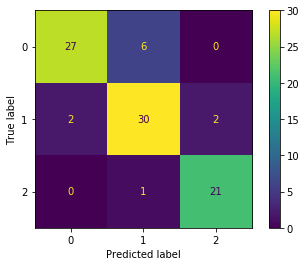

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtree,X_test,y_test)
plt.show()

### 4.6) Do the accuracy score or confusion matrix reveal any substantial problems with this model's performance? Explain your answer.

In [ ]:
"""
There is a bit of a bias toward label 1 which could be due to the class imbalance and 1 being the majority class. Most cases of 
wrong predictions were classified as 1. There may be some anomolous points that are throwing it off.
"""